In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
hermes_process_state = pd.read_csv('dataset/hermes_process_states.csv')
hermes_process_state.head()

In [ ]:
knowledge_tools = pd.read_csv('dataset/knowledge_tools.csv')
knowledge_tools.head()

In [ ]:
knowledge_analysis_categories = pd.read_csv('dataset/knowledge_analysis_categories.csv')
knowledge_analysis_categories.head()

In [2]:
hermes_process_logs = pd.read_csv('dataset/hermes_process_logs.csv')
hermes_process_logs.head()

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
0,13341,6282297999004@c.us,Hermes,Noted Mbak,"Good morning, I've received the photos and the...",1.0,"{""user"": ""partner-6282297999004@c.us-20240423-...","{""data"": {""cost"": 56.625, ""completion"": {""inde...",1.0,goal-setting,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23 00:03:20,2024-04-23 00:04:56
1,13341,6282297999004@c.us,Hermes,Noted Mbak,"Good morning, I've received the photos and the...",1.0,"{""user"": ""partner-6282297999004@c.us-20240423""...","{""data"": {""cost"": 995.1, ""completion"": {""index...",3.0,generate-answer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23 00:03:20,2024-04-23 00:04:56
2,13341,6282297999004@c.us,Hermes,Noted Mbak,"Good morning, I've received the photos and the...",1.0,"{""user"": ""partner-6282297999004@c.us-20240423""...","{""data"": {""cost"": 60.465, ""completion"": {""inde...",4.0,validate-answer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23 00:03:20,2024-04-23 00:04:56
3,13342,HMMWZJPTAK,Hosting,"Hi, \nCan you please respond to my request abo...","Hi Sergey,\n\nThank you for reaching out with ...",2.0,"{""user"": ""guest-confirmed-HMMWZJPTAK-202404230...","{""data"": {""cost"": 39.1575, ""completion"": {""ind...",1.0,goal-setting,...,request_extension,For request messages that intent to extend the...,Sergey has requested a response regarding exte...,Handle the request to extend the booking durat...,4.0,check_property_calendar,"{""room_id"": 397675, ""check_in_date"": ""2024-04-...","{'information': ""Currently, the property that ...",2024-04-23 00:03:46,2024-04-23 00:04:24
4,13342,HMMWZJPTAK,Hosting,"Hi, \nCan you please respond to my request abo...","Hi Sergey,\n\nThank you for reaching out with ...",2.0,"{""user"": ""guest-confirmed-HMMWZJPTAK"", ""model""...","{""data"": {""cost"": 33.6825, ""completion"": {""ind...",2.0,tool-calling,...,request_extension,For request messages that intent to extend the...,Sergey has requested a response regarding exte...,Handle the request to extend the booking durat...,4.0,check_property_calendar,"{""room_id"": 397675, ""check_in_date"": ""2024-04-...","{'information': ""Currently, the property that ...",2024-04-23 00:03:46,2024-04-23 00:04:24


In [3]:
hermes_process_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103472 entries, 0 to 103471
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    103472 non-null  int64  
 1   user_id               103472 non-null  object 
 2   agent_name            103472 non-null  object 
 3   last_message          103350 non-null  object 
 4   final_answer          100469 non-null  object 
 5   escalation_status     103177 non-null  float64
 6   prompt_arguments      102772 non-null  object 
 7   prompt_response       102772 non-null  object 
 8   state_id              102772 non-null  float64
 9   state_name            102772 non-null  object 
 10  category_id           81872 non-null   float64
 11  category_name         81872 non-null   object 
 12  category_description  81872 non-null   object 
 13  category_summary      81872 non-null   object 
 14  category_actions      81863 non-null   object 
 15  

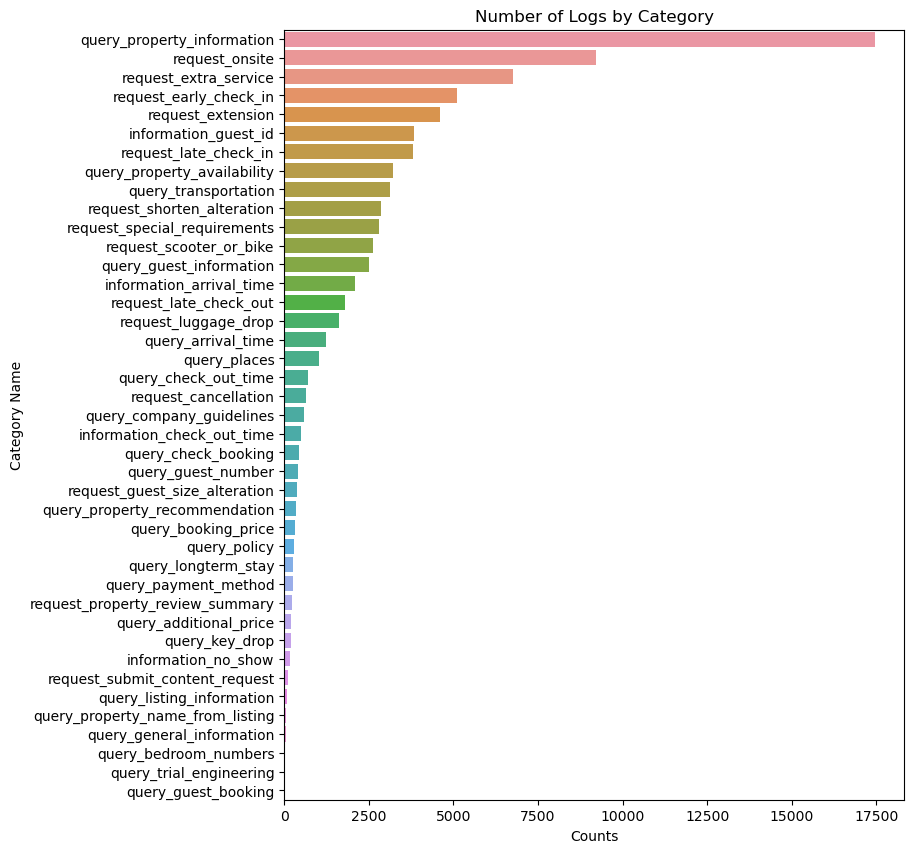

In [4]:
# groupby category name and count the number of logs horizontally
category_counts = hermes_process_logs.groupby('category_name').size().reset_index(name='counts')
category_counts = category_counts.sort_values('counts', ascending=False)

# Plot the category counts vertically
plt.figure(figsize=(8, 10))  # Adjust figure size as needed
sns.barplot(x='counts', y='category_name', data=category_counts, orient='h')  
plt.xlabel('Counts')
plt.ylabel('Category Name')
plt.title('Number of Logs by Category')
plt.show()



In [5]:
# get data only for category onsite
onsite = hermes_process_logs[hermes_process_logs['category_name'] == 'request_onsite']
onsite.head()

,id,user_id,agent_name,last_message,final_answer,escalation_status,prompt_arguments,prompt_response,state_id,state_name,...,category_name,category_description,category_summary,category_actions,tool_id,tool_name,tool_arguments,tool_response,created_at,updated_at
98,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC-202404230...","{""data"": {""cost"": 38.26500000000001, ""completi...",1.0,goal-setting,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
99,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC"", ""model""...","{""data"": {""cost"": 35.3175, ""completion"": {""ind...",2.0,tool-calling,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
100,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": null, ""model"": ""gpt-3.5-turbo-1106"", ...","{""data"": {""cost"": 3.0900000000000003, ""complet...",5.0,tool-execution,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
101,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC"", ""model""...","{""data"": {""cost"": 736.35, ""completion"": {""inde...",3.0,generate-answer,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17
102,13357,HM43CK89JC,Hosting,"Hi, there’s ants in the number 3 bathroom and ...","Hi Bailey,\n\nI'm sorry to hear about the issu...",1.0,"{""user"": ""guest-confirmed-HM43CK89JC"", ""model""...","{""data"": {""cost"": 46.8525, ""completion"": {""ind...",4.0,validate-answer,...,request_onsite,For guest requests related to amenities such a...,Bailey Heap reported encountering ants in the ...,Assist with on-site issues regarding ant prese...,21.0,send_onsite_request_to_staff,"{""booking_id"": ""HM43CK89JC"", ""guest_request_in...",{'information': 'Message has been sent to staf...,2024-04-23 00:42:36,2024-04-23 00:43:17


In [6]:
onsite.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9206 entries, 98 to 103445
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9206 non-null   int64  
 1   user_id               9206 non-null   object 
 2   agent_name            9206 non-null   object 
 3   last_message          9181 non-null   object 
 4   final_answer          9105 non-null   object 
 5   escalation_status     9200 non-null   float64
 6   prompt_arguments      9206 non-null   object 
 7   prompt_response       9206 non-null   object 
 8   state_id              9206 non-null   float64
 9   state_name            9206 non-null   object 
 10  category_id           9206 non-null   float64
 11  category_name         9206 non-null   object 
 12  category_description  9206 non-null   object 
 13  category_summary      9206 non-null   object 
 14  category_actions      9206 non-null   object 
 15  tool_id               9

In [23]:
# convert created_at to datetime
onsite['created_at'] = pd.to_datetime(onsite['created_at'])
# convert updated_at to datetime
onsite['updated_at'] = pd.to_datetime(onsite['updated_at'])
onsite.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9206 entries, 98 to 103445
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9206 non-null   int64         
 1   user_id               9206 non-null   object        
 2   agent_name            9206 non-null   object        
 3   last_message          9181 non-null   object        
 4   final_answer          9105 non-null   object        
 5   escalation_status     9200 non-null   float64       
 6   prompt_arguments      9206 non-null   object        
 7   prompt_response       9206 non-null   object        
 8   state_id              9206 non-null   float64       
 9   state_name            9206 non-null   object        
 10  category_id           9206 non-null   float64       
 11  category_name         9206 non-null   object        
 12  category_description  9206 non-null   object        
 13  category_summary    

In [10]:
onsite['escalation_status'].value_counts()

escalation_status
2.0    7471
3.0    1198
1.0     531
Name: count, dtype: int64

In [ ]:
# check onsite final answer that null
onsite_final_answer_null = onsite[onsite['final_answer'].isnull()]
# check the for specific id 
onsite_final_answer_null.iloc[8]

## check null value

In [11]:
# Display the columns with null values and their counts
null_counts = onsite.isnull().sum()
print(null_counts[null_counts > 0])

last_message          25
final_answer         101
escalation_status      6
tool_id               92
tool_name             92
tool_arguments        92
tool_response         95
dtype: int64


In [ ]:
# check on each row if the final_answer is null and escalation_status is also null
onsite[(onsite['final_answer'].isnull()) & (onsite['escalation_status'].isnull())]

In [12]:
# count unique id 
onsite['id'].nunique()

1051

In [13]:
onsite['user_id'].nunique()

550

In [19]:
# count the number of logs for each user_id
user_counts = onsite['user_id'].value_counts().reset_index(name='counts')
user_counts = user_counts.sort_values('counts', ascending=False)

# show the top 10 users with the most logs
user_counts.head(10)

,user_id,counts
0,HM49ZD3JBF,143
1,HM8KCP8M4F,90
2,HMFQ93NB45,85
3,HM8AKS2FTC,79
4,HM2B8SWY5M,75
5,HM5YFWWHSN,73
6,HMRAK4EHY4,69
7,HMRJAAJSBY,68
8,HMHM25FHYJ,64
9,HMKWX8H22E,63


## check response send or not send.

In [14]:
# from onsite tool_responce column, there is two type of response
# 1. Message has been sent to staff
# 2. Message not sent because

# Function to determine if message was sent or not
def extract_response_type(response):
    if "Message has been sent to staff" in response:
        return "Sent"
    elif "Message was not sent because" in response:
        return "Not Sent"
    else:
        return "Unknown"

# Ensure the 'tool_response' column is filled with empty strings where there are NaNs
onsite.loc[:,'tool_response'] = onsite['tool_response'].fillna('')

# Apply function to extract response type, and use .loc to avoid SettingWithCopyWarning
onsite = onsite.copy()
onsite.loc[:,'response_type'] = onsite['tool_response'].apply(extract_response_type)

# Count occurrences
sent_count = onsite[onsite['response_type'] == 'Sent'].shape[0]
not_sent_count = onsite[onsite['response_type'] == 'Not Sent'].shape[0]

print("Sent Count:", sent_count)
print("Not Sent Count:", not_sent_count)

Sent Count: 5748
Not Sent Count: 3091


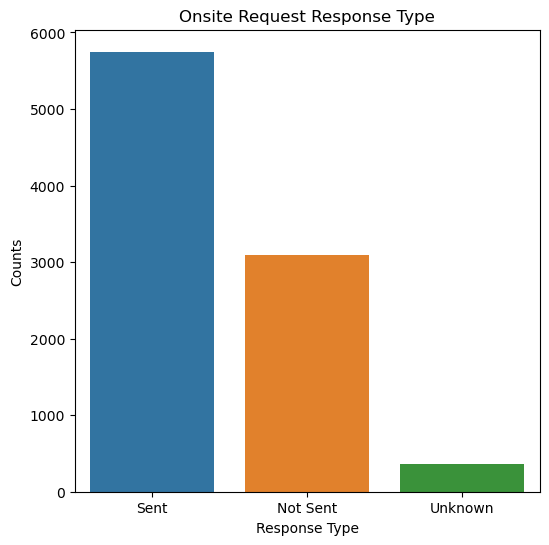

In [15]:
# Plot the response type counts
plt.figure(figsize=(6, 6))
sns.countplot(x='response_type', data=onsite)
plt.xlabel('Response Type')
plt.ylabel('Counts')
plt.title('Onsite Request Response Type')
plt.show()

In [24]:
# Average response time for sent requests
onsite_sent = onsite[onsite['response_type'] == 'Sent']
onsite_sent.loc[:,'response_time'] = (onsite_sent['updated_at'] - onsite_sent['created_at']).dt.total_seconds()
average_response_time = onsite_sent['response_time'].mean()

# Print counts
print("Sent Count:", sent_count)
print("Not Sent Count:", not_sent_count)
print(f"Average Response Time for Sent Requests: {average_response_time:.2f} seconds")

Sent Count: 5748
Not Sent Count: 3091
Average Response Time for Sent Requests: 38.85 seconds


C:\Users\ahini\AppData\Local\Temp\ipykernel_7904\2108703357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onsite_sent.loc[:,'response_time'] = (onsite_sent['updated_at'] - onsite_sent['created_at']).dt.total_seconds()


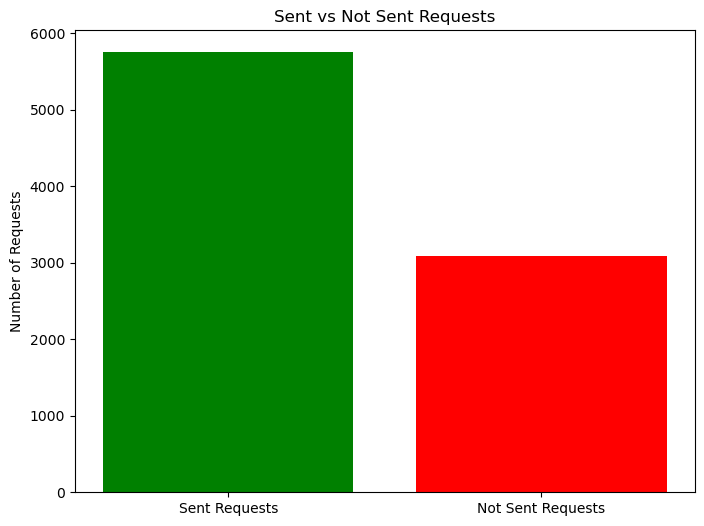

In [25]:
# Bar chart for sent vs not sent requests
plt.figure(figsize=(8, 6))
plt.bar(['Sent Requests', 'Not Sent Requests'], [sent_count, not_sent_count], color=['green', 'red'])
plt.title('Sent vs Not Sent Requests')
plt.ylabel('Number of Requests')
plt.show()


In [26]:
# Recommendations
success_rate = (sent_count / (sent_count + not_sent_count)) * 100
print(f"Success Rate: {success_rate:.2f}%")
if success_rate < 90:
    print("Recommendation: Investigate the causes of unsent requests and improve system reliability.")
else:
    print("System is performing well with a high success rate.")

Success Rate: 65.03%
Recommendation: Investigate the causes of unsent requests and improve system reliability.


## check some reqeust 

Text(0.5, 1.0, 'Onsite Request State Counts')

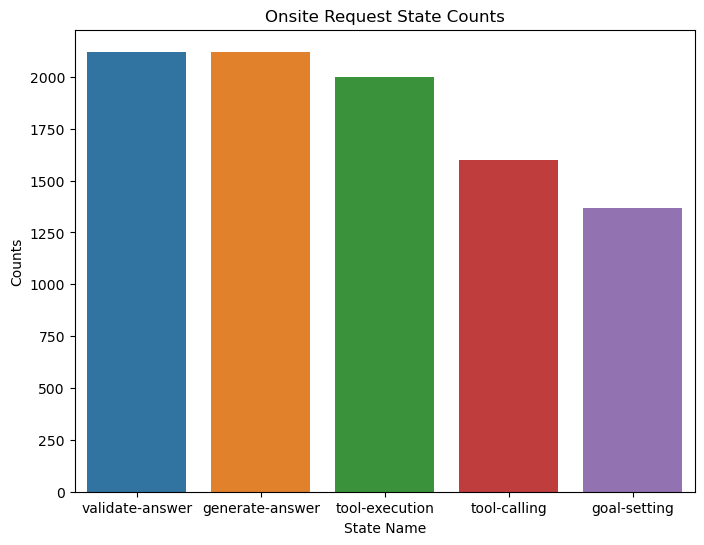

In [27]:
# from onsite count and group by state_name
state_counts = onsite['state_name'].value_counts().reset_index(name='counts')
state_counts = state_counts.sort_values('counts', ascending=False)

# Plot the state counts
plt.figure(figsize=(8, 6))
sns.barplot(y='counts', x='state_name', data=state_counts)
plt.ylabel('Counts')
plt.xlabel('State Name')
plt.title('Onsite Request State Counts')

In [43]:
# find all log for user_id
onsite_user = onsite[onsite['user_id'] ==  'HMHWNXDWSD']

# group by state_name and send/not send
state_response_counts = onsite_user.groupby(['state_name', 'response_type']).size().reset_index(name='counts')
state_response_counts = state_response_counts.sort_values('counts', ascending=False)
state_response_counts

,state_name,response_type,counts
0,generate-answer,Not Sent,4
4,validate-answer,Not Sent,4
1,goal-setting,Not Sent,2
2,tool-calling,Not Sent,2
3,tool-execution,Not Sent,2


## check about unknown response/error

In [ ]:
# there is unknown response type
onsite_unknown = onsite[onsite['response_type'] == 'Unknown']

onsite_unknown.head(20)